<a href="https://colab.research.google.com/github/Muskan-droiddd/WINE-QUALITY-DATASET/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WINE QUALITY DATASET

DATA PREPROCESSING

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("winequality-red.csv", delimiter=";")


# Clean column names
df.columns = df.columns.str.strip()

# Check column names
print(df.columns)

# Separate features and target
X = df.drop("quality", axis=1)
y = df["quality"].values

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


FEATURE ENGINEERING - POLYNOMIAL EXPANSION

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


TRAINING MODELS

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from time import time

models = {
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

results = {}

for name, model in models.items():
    start = time()
    model.fit(X_poly, y_train)
    y_pred = model.predict(X_test_poly)
    elapsed = time() - start
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred),
        "Time (s)": elapsed
    }


PLOT LEARNING CURVES

✅ Plotting learning curve


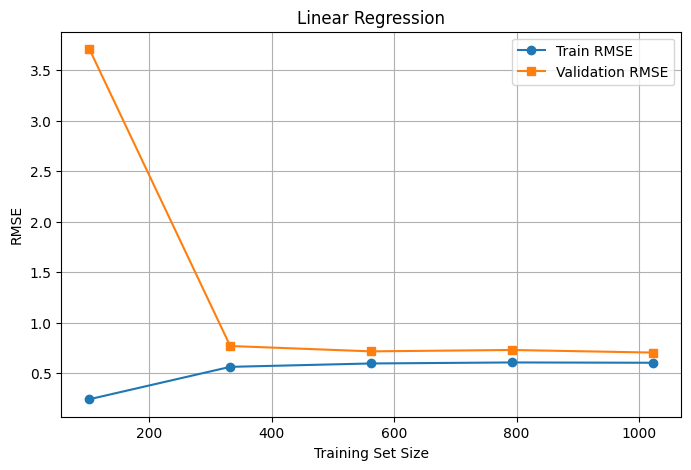

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring="neg_mean_squared_error")
    train_rmse = (-train_scores.mean(axis=1)) ** 0.5
    val_rmse = (-val_scores.mean(axis=1)) ** 0.5

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_rmse, 'o-', label="Train RMSE")
    plt.plot(train_sizes, val_rmse, 's-', label="Validation RMSE")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()

print(" Plotting learning curve")
plot_learning_curve(LinearRegression(), X_poly, y_train, "Linear Regression")


HYPERPAEAMETER TUNING WITH GRID SEARCH

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring="neg_mean_squared_error")
ridge_search.fit(X_poly, y_train)
print("Best Ridge α:", ridge_search.best_params_)


Best Ridge α: {'alpha': 100.0}


FEATURE ANALYSIS

In [17]:
feature_names = poly.get_feature_names_out(df.drop("quality", axis=1).columns)

for name in results:
    if name in ["Ridge", "Lasso", "Linear Regression"]:
        coefs = models[name].coef_
        top_feature = feature_names[np.argmax(np.abs(coefs))]
        results[name]["Top Feature"] = top_feature


COMPARISON TABLE

In [18]:
import pandas as pd

comparison_df = pd.DataFrame(results).T
print(comparison_df)


                                 RMSE                          R²  Time (s)  \
LinearRegression             0.617945                     0.41568  0.029868   
SGDRegressor      257882406116.654755 -101763946612686401306624.0  0.005914   
Ridge                        0.617413                    0.416687  0.004351   
Lasso                        0.660379                    0.332676  0.003742   

                 Top Feature  
LinearRegression         NaN  
SGDRegressor             NaN  
Ridge                alcohol  
Lasso                alcohol  
